In [1]:
%pylab
import powerlaw
import pickle
def load_dict(name):
        with open('dict-' + name + '.pkl', 'rb') as f:
                return pickle.load(f)
fire=load_dict("fire")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Here we apply the statistical machinery to investigate the properites of the total area burnt on Portugal. I use the module "powerlaw" that is consistent with the article " Power law in empirical data". See "powerlaw: a Python package for analysis of heavy-tailed distributions" as a reference.

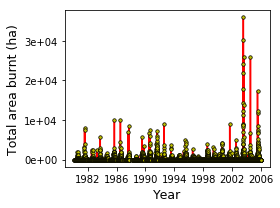

In [8]:
%matplotlib inline

figure(figsize=(4,3))
fire=load_dict("fire")
a=fire["tot_burnt"]
ax=gca()
ign=fire["ignition_date"]
date=[datetime.date(1900, 1, 1) + datetime.timedelta(int(i)) for i in ign]
plot_date(date,a,xdate=True,fmt="r.",ms=7,mew=0.7,ls="-",mec="k",mfc="y") 
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.e'))
xlabel("Year",fontsize=12.5)
ylabel("Total area burnt (ha)",fontsize=12.5)
#ax.xaxis.set_major_formatter(matplotlib.ticker.MaxNLocator(nbins=4))
tight_layout()
savefig("series.pdf")

In [25]:
plot?

In [3]:
fit.supported_distributions

{'exponential': powerlaw.Exponential,
 'lognormal': powerlaw.Lognormal,
 'lognormal_positive': powerlaw.Lognormal_Positive,
 'power_law': powerlaw.Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law}

In [9]:
%matplotlib
a=fire["tot_burnt"]
a=a[a>1]

fit=powerlaw.Fit(a)
R, p = fit.distribution_compare('stretched_exponential','power_law',  normalized_ratio=True)
fig = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig,ls="--",label="powerlaw")
fit.stretched_exponential.plot_ccdf(ax=fig,ls="-.",label="stretched")
fit.lognormal.plot_ccdf(ax=fig,ls="-.",label="lognorm")
#plot(sort(a),1-arange(0,len(a))/len(a),"r") 
R,p
legend()

Using matplotlib backend: Qt5Agg


Calculating best minimal value for power law fit
/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Using matplotlib backend: Qt5Agg


Calculating best minimal value for power law fit
/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Anderson-Darling distance1170.0


Calculating best minimal value for power law fit


2.4268220039367381

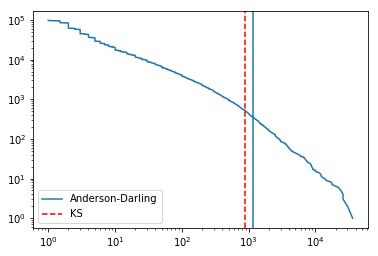

In [27]:
%matplotlib
a=fire["tot_burnt"]
a=a[a>1]
fit=powerlaw.Fit(a,xmin_distance="Asquare")
#plot(x,y,".")
plot(sort(a),len(a)-arange(0,len(a))) 
loglog()
fit.Asquare
print("Anderson-Darling distance"+str(fit.xmin))
axvline(fit.xmin,label="Anderson-Darling")
fit=powerlaw.Fit(a,xmin_distance="D")
axvline(fit.xmin,ls="--",c="r",label="KS")
legend()
plot()
fit.alpha

/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


Anderson-Darling distance1170.0


Calculating best minimal value for power law fit


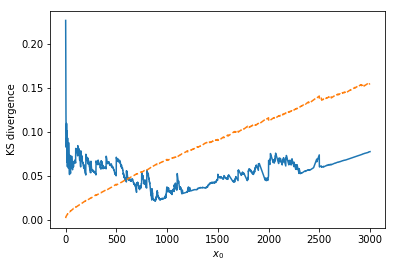

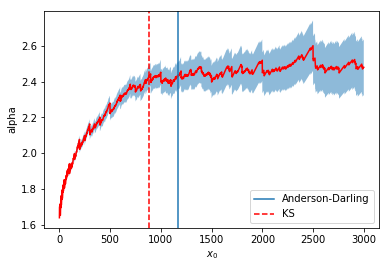

In [10]:
%matplotlib inline
KS=[]
alpha=[]
sigma=[]
for i in arange(min(a), 3000):
    fit=powerlaw.Fit(a,xmin=i,discrete=False)
    KS+=[fit.D]
    alpha+=[fit.alpha]
    sigma+=[fit.sigma]
alpha=array(alpha)
sigma=array(sigma)
plot(arange(min(a),3000),KS,"-")
xlabel("$x_0$")
ylabel("KS divergence")
plot(arange(min(a),3000),sigma,"--")

figure()
plot(arange(min(a),3000),alpha,"r-")
fill_between(arange(min(a),3000),alpha+sigma,alpha-sigma,alpha=0.5)
xlabel("$x_0$")
ylabel("alpha")

fit=powerlaw.Fit(a,xmin_distance="Asquare")
fit.Asquare
print("Anderson-Darling distance"+str(fit.xmin))
axvline(fit.xmin,label="Anderson-Darling")
fit=powerlaw.Fit(a,xmin_distance="D")
axvline(fit.xmin,ls="--",c="r",label="KS")
legend()
numpy.save("alpha.npy",[alpha,sigma,KS])

In [28]:
fit=powerlaw.Fit(a)
fit.xmin

Calculating best minimal value for power law fit
/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


880.0

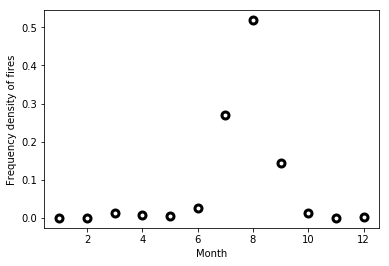

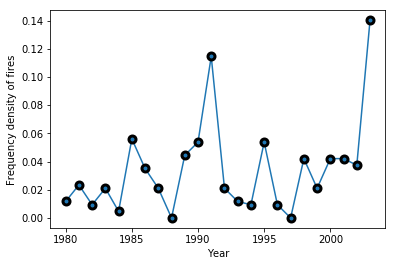

In [6]:
def area_over_time():
    area=fire["tot_burnt"]
    ign=fire["ignition_date"]
    cond=(area>1000)&(ign>0)
    area=area[cond]
    ign=ign[cond]
    y=from_days_to_date(ign,"month")
    h,b=histogram(y,bins=arange(1,14),density=True)
    plot(b[:-1],h,"wo",ms=7,mec="k",mew=3)
    ylabel("Frequency density of fires")
    xlabel("Month")
    figure()
    '''title("area")
    hist(y,bins=arange(1,14),weights=area)'''
    y=from_days_to_date(ign,"year")
    h,b=histogram(y,bins=arange(min(y),max(y)+2,1),density=True)
    plot(b[:-3],h[:-2],"-o",ms=7,mec="k",mew=3)
    ylabel("Frequency density of fires")
    xlabel("Year")
def from_days_to_date(b,feature="month"):
    if feature=="day":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).day for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    elif feature=="month":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).month for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    elif feature=="year":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).year for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    else:
        raise NameError("accepted features are: days, month or year")
%matplotlib inline
area_over_time()

In [20]:
area=fire["tot_burnt"]
cond=area>1
area=area[cond]
c=fire["cause"]
c=c[cond]
year=array(from_days_to_date(c,"year"))
#year=year[cond]
count_nonzero(c[0])
len(year)

97793

Let's analyse the causes

/home/k1762355/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/k1762355/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


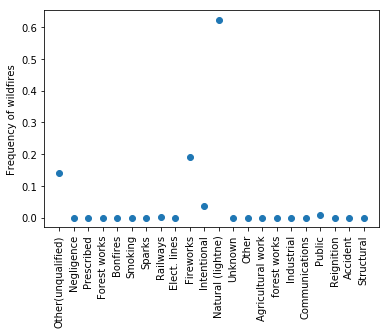

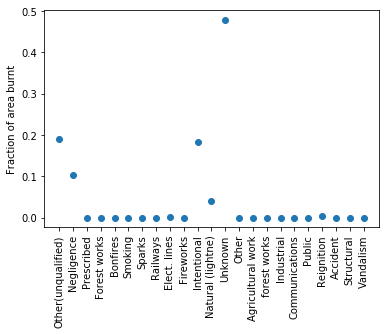

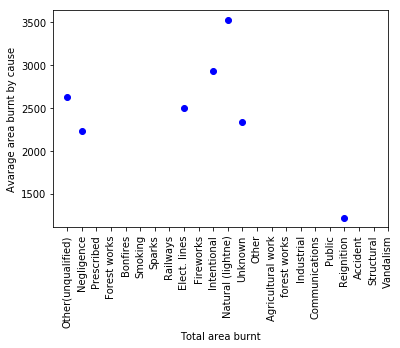

In [7]:
%matplotlib inline
a=fire["tot_burnt"]
cond=[a>880]
a=a[cond]
c=fire["cause"]
c=c[cond]
my_xticks = ["Other(unqualified)",'Negligence','Prescribed','Forest works','Bonfires',"Smoking","Sparks","Railways","Elect. lines","Fireworks","Intentional","Natural (lightne)","Unknown","Other","Agricultural work","forest works","Industrial","Communications","Public","Reignition","Accident","Structural","Vandalism"]
h,b=histogram(c,bins=arange(1,24),density=True)
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("Frequency of wildfires")
plot(b[:-1],h,"o")
figure()
h,b=histogram(c,weights=a,bins=arange(0,24),density=True)
ylabel("Fraction of area burnt")
plt.xticks(b[:-1], my_xticks,rotation=90)
plot(b[:-1],h,"o")
figure()

for caus in arange(0,23):
    plot(caus,mean(a[c==caus]),"bo")
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("Avarage area burnt by cause")
xlabel("Total area burnt")

We have observed that natural fires are  

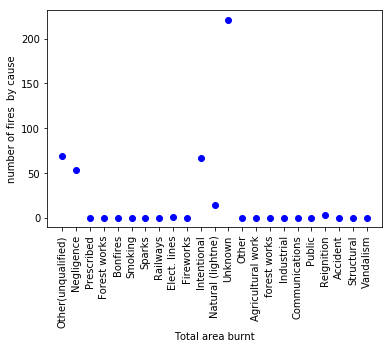

In [19]:
%matplotlib inline
a=fire["tot_burnt"]
cond=[a>1]
a=a[cond]
c=fire["cause"]
c=c[cond]
for caus in arange(0,23):
    cond2=(c==caus)&(a>1000)
    plot(caus,len(a[cond2]),"bo")
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("number of fires  by cause")
xlabel("Total area burnt")

Make the cumulative respect to different causes

Using matplotlib backend: Qt5Agg
alpha due to natural causes is2.17639389784


Calculating best minimal value for power law fit
/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


[]

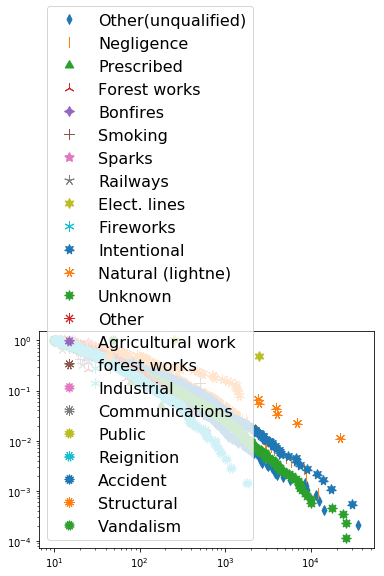

In [20]:
%matplotlib 
figure()
markers = [(int(2+i/2), int(1+i%2), 0) for i in arange(23)]
a=fire["tot_burnt"]
cond=[a>10]
a=a[cond]
c=fire["cause"]
c=c[cond]
#plot(sort(a),1-arange(0,len(a))/len(a),"--")
for caus in arange(0,23):
    plot(sort(a[c==caus]),1-arange(0,len(a[c==caus]))/len(a[c==caus]),marker=markers[caus],ms=10,ls='')
fit=powerlaw.Fit(a[c==11],xmin_distance="Asquare")
print("alpha due to natural causes is"+str(fit.alpha))
legend(my_xticks,loc="lower left",fontsize=16)
loglog()

Let's consider  only the causes of wilfire that has an effect on tails.
From the result of below we observe that "Other(unqualified),NEgligence, Intentional, Natural,Unknown,Other,Reignition

In [ ]:
%matplotlib
figure()
markers = [(int(2+i/2), int(1+i%2), 0) for i in arange(23)]
a=fire["tot_burnt"]
cond=[a>100]
a=a[cond]
c=fire["cause"]
b=hist(c[cond],bins=arange(0,24))
title("Histogram of the causes for high burned area (a>100)")
h=b[0]
bins=b[1][:-1]
xticks(bins, my_xticks,rotation=90)
bins=bins[h>10]
print(str(bins)+"are the causes that we look at")

#to make the cumulative density by cause on what is left
'''for caus in bins:
    plot(sort(a[c==caus]),1-arange(0,len(a[c==caus]))/len(a[c==caus]),marker=markers[caus],ls='--',label=my_xticks[caus])
legend()'''

[]

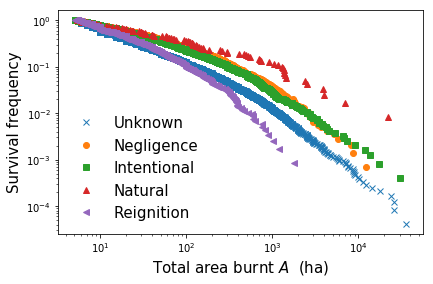

In [23]:
#figure(figsize=(4,3))
a=fire["tot_burnt"]
c=fire["cause"]
cond=[a>5]
a=a[cond]
c=c[cond]
unknown=(c==0)| (c==12)
plot(sort(a[unknown]),1-arange(0,len(a[unknown]))/len(a[unknown]),"x",label="Unknown")
plot(sort(a[c==1]),1-arange(0,len(a[c==1]))/len(a[c==1]),"o",label="Negligence")
plot(sort(a[c==10]),1-arange(0,len(a[c==10]))/len(a[c==10]),"s",label="Intentional")
plot(sort(a[c==11]),1-arange(0,len(a[c==11]))/len(a[c==11]),"^",label="Natural")
plot(sort(a[c==19]),1-arange(0,len(a[c==19]))/len(a[c==19]),"<",label="Reignition")
legend(fontsize=15,frameon=False)
xlabel("Total area burnt $A$  (ha)",fontsize=15)
ylabel("Survival frequency",fontsize=15)
tight_layout()
loglog()

In [ ]:
b=a[c==caus]
len(b[b>100])/len(b) #survival function

In [ ]:
#fig4 = fit.plot_ccdf(linewidth=3)
fig4=gca()
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--')
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--')

In [26]:
a=fire["tot_burnt"]
c=fire["cause"]
(len(a[c==0])+len(a[c==12]))/len(a)

0.9235278684765762